# 1

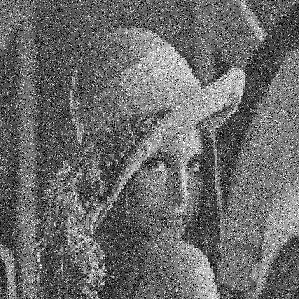

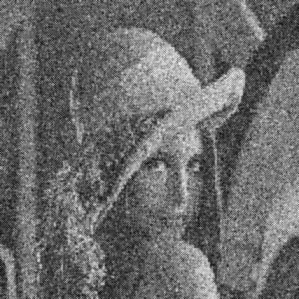

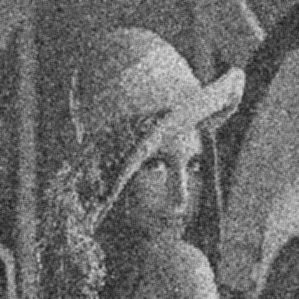

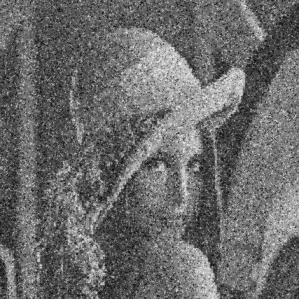

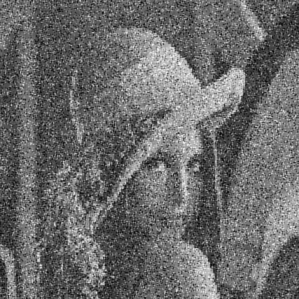

In [ ]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np

uploaded = files.upload() #upload da imagem para o colab
img = cv2.imread('lena_ruido.bmp')

matriz1 = np.array([[0, 1, 0],[1,1,1],[0,1,0]]) / 5

matriz2 = np.array([[1, 1, 1],[1,1,1],[1,1,1]]) / 9

matriz3 = np.array([[1, 3, 1],[3,16,3],[1,3,1]]) / 32

matriz4 = np.array([[0, 1, 0],[1,4,1],[0,1,0]]) / 8


imgMat1 = cv2.filter2D(img, -1, matriz1)
imgMat2 = cv2.filter2D(img, -1, matriz2)
imgMat3 = cv2.filter2D(img, -1, matriz3)
imgMat4 = cv2.filter2D(img, -1, matriz4)

cv2_imshow(img)
print('')
cv2_imshow(imgMat1)
print('')
cv2_imshow(imgMat2)
print('')
cv2_imshow(imgMat3)
print('')
cv2_imshow(imgMat4)

# 2

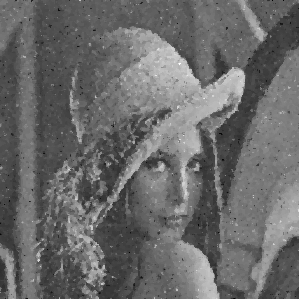

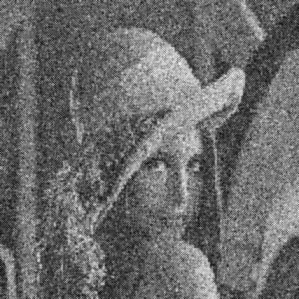

In [ ]:
uploaded = files.upload()
img = cv2.imread('lena_ruido.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mediana3x3 = cv2.medianBlur(img, 3)

cv2_imshow(mediana3x3)
cv2_imshow(imgMat1)




## Podemos perceber que a mediana consegue deixar a imagem mais nitida e reduzir mais o ruido do que as máscaras do exercício anterior

# 3


MAIOR BIN:  1199.0



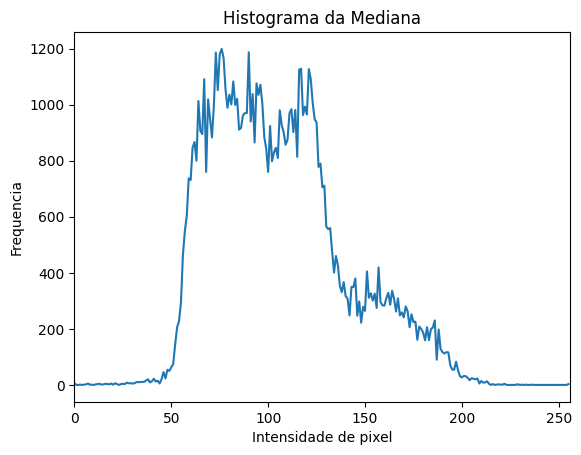


MAIOR BIN:  1010.0



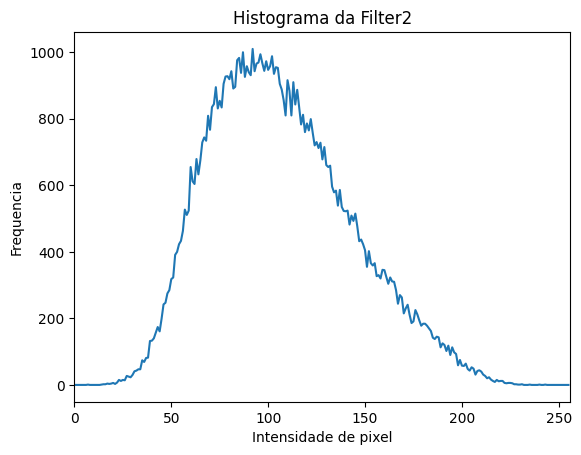

In [ ]:
# Comparação de histogramas
import matplotlib.pyplot as plt
histograma = cv2.calcHist([mediana3x3], [0], None, [256], [0, 256])
print('')
print("MAIOR BIN: ", histograma.max())
print('')
plt.plot(histograma)
plt.title("Histograma da Mediana")
plt.xlabel("Intensidade de pixel")
plt.ylabel("Frequencia")
plt.xlim(0,256)
plt.show()

histograma = cv2.calcHist([imgMat1], [0], None, [256], [0, 256])
print('')
print("MAIOR BIN: ", histograma.max())
print('')
plt.plot(histograma)
plt.title("Histograma da Filter2")
plt.xlabel("Intensidade de pixel")
plt.ylabel("Frequencia")
plt.xlim(0,256)
plt.show()

## Ao analisar o histograma, percebemos que o histograma da mediana consegue explicar melhor os pixels tendo mais frequencias em outras intensidades. Enquanto o histograma da Filter2D mantém uma frequência mais centralizada na intensidade entre 80-110

# 4

Saving lena_gray.bmp to lena_gray.bmp


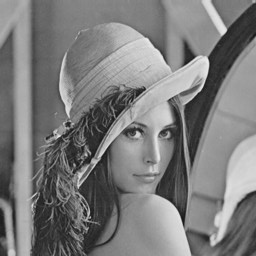

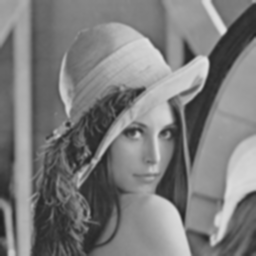

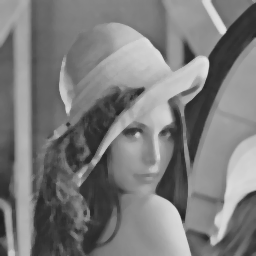

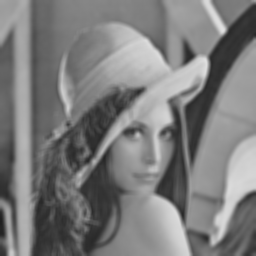

In [ ]:
uploaded = files.upload()
img = cv2.imread('lena_gray.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


gaussian = cv2.GaussianBlur(img, (5,5), 0)
mediana = cv2.medianBlur(img, 5)
blur = cv2.blur(img, (5,5))

cv2_imshow(img)
cv2_imshow(gaussian)
cv2_imshow(mediana)
cv2_imshow(blur)

# 5

RESULTADOS CANNY


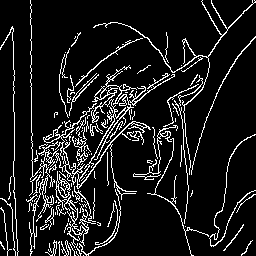

RESULTADOS SOBEL


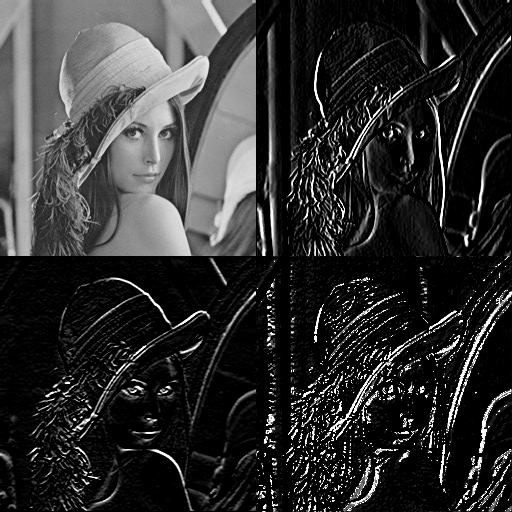

In [ ]:
uploaded = files.upload()
img = cv2.imread('lena_gray.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# a) Canny
canny = cv2.Canny(img, 70, 200)
print('RESULTADOS CANNY')
cv2_imshow(canny)


# b) Sobel
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0) # Sobel horizontal
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1) # Sobel Vertical

sobel = cv2.bitwise_or(sobelX, sobelY) # Sobel Vertical + Horizontal
resultado = np.vstack([
np.hstack([img, sobelX]),
np.hstack([sobelY, sobel])
]) # Juntando as imagens
print('RESULTADOS SOBEL')
cv2_imshow(resultado)


#c) O Canny consegue fazer bordar mais fortes e detectar elementos mais importantes, o sobel usando o gradiente (x e y) realiza bordas mais leves porém
# Consegue detectar mais detalhes


# 6

In [ ]:
uploaded = files.upload()
arvore = cv2.imread('arvore-solitaria.jpg')
arvore = cv2.cvtColor(arvore, cv2.COLOR_BGR2GRAY)
uploaded = files.upload()
pedras = cv2.imread('pedra.jpg')
pedras = cv2.cvtColor(pedras, cv2.COLOR_BGR2GRAY)

# ARVORE

## Sobel
sobelX = cv2.Sobel(arvore, cv2.CV_64F, 1, 0) # Sobel horizontal
sobelY = cv2.Sobel(arvore, cv2.CV_64F, 0, 1) # Sobel Vertical

sobel = cv2.bitwise_or(sobelX, sobelY) # Sobel Vertical + Horizontal
print('RESULTADOS SOBEL')
cv2_imshow(sobel)

## Canny
canny = cv2.Canny(arvore, 70, 200)
print('RESULTADOS CANNY')
cv2_imshow(canny)


# Pedra

## Sobel
sobelX = cv2.Sobel(pedras, cv2.CV_64F, 1, 0) # Sobel horizontal
sobelY = cv2.Sobel(pedras, cv2.CV_64F, 0, 1) # Sobel Vertical

sobel = cv2.bitwise_or(sobelX, sobelY) # Sobel Vertical + Horizontal
print('RESULTADOS SOBEL')
cv2_imshow(sobel)

## Canny
canny = cv2.Canny(pedras, 20, 120)
print('RESULTADOS CANNY')
cv2_imshow(canny)


## O Melhor resultado encontrado foi o canny para as duas imagens!